# Keywords: modules, optimizers, dense layer


# High Level Concepts

## Modules

Modules help to organize and composing functions and inputs (weights) together.

In [1]:
from torch import nn
from torch.nn import init
from torch.nn.modules import loss
import torch
import math
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from sklearn.metrics import confusion_matrix
from timeit import default_timer as timer

Some examples:

In [2]:
# 10 input features 10 output features
linear = nn.Linear(10, 10)
linear

Linear(in_features=10, out_features=10, bias=True)

In [3]:
linear(torch.tensor([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0]))

tensor([ 0.3224,  2.9591, -1.2117, -1.4629, -3.3487, -3.0964,  3.9498,  2.3097,
         0.1073, -0.0669], grad_fn=<AddBackward0>)

In [4]:
relu = nn.ReLU()
relu

ReLU()

In [5]:
x = torch.tensor([1.0])
relu(x)

tensor([1.])

In [6]:
tanh = nn.Tanh()
tanh

Tanh()

In [7]:
dropout = nn.Dropout(0.5)
dropout

Dropout(p=0.5, inplace=False)

In [8]:
sequential = nn.Sequential(nn.Linear(10, 100), nn.Tanh(), nn.Linear(100,100), nn.Tanh(), nn.Linear(100,10))
sequential

# No activaiton at the end, because its embedded in the loss function (softmax)

Sequential(
  (0): Linear(in_features=10, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Tanh()
  (4): Linear(in_features=100, out_features=10, bias=True)
)

In [9]:
# Note about this syntax; not simple assignment, there is magic. If you want to build your own combinat
# combination model you should always follows this structure
# Dictionary exists of all submodules
# Explicit creation of the layer inside the class
# Just always follow this structure (behind the scenes magic)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(10,100)
        self.act1 = nn.Tanh()
        self.lin2 = nn.Linear(100,100)
        self.lin3 = nn.Linear(100,100)
        self.lin4 = nn.Linear(100,10)
        
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act1(x)
        x = self.lin3(x)
        x = self.act1(x)
        x = self.lin4(x)
        return x
net = Net()
net


Net(
  (lin1): Linear(in_features=10, out_features=100, bias=True)
  (act1): Tanh()
  (lin2): Linear(in_features=100, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=100, bias=True)
  (lin4): Linear(in_features=100, out_features=10, bias=True)
)

In [10]:
cross_entropy = loss.CrossEntropyLoss()
cross_entropy

CrossEntropyLoss()

In [11]:
from torch.nn import Module

In [12]:
from torch.nn import Parameter

We can define our own modules subclassing `Module` class.

Modules can have constant parameters (arguments).

In [13]:
class Power(Module):

    __constants__ = ['exponent']

    def __init__(self, exponent=3):
        super().__init__()
        self.exponent = exponent

    def forward(self, input):
        return torch.pow(input, self.exponent)

    def extra_repr(self):
        return f'exponent={self.exponent}'

In [14]:
# f-strings
f'2+1={2+1}'

'2+1=3'

In [15]:
power=Power(3)

In [16]:
power

Power(exponent=3)

In [17]:
power

Power(exponent=3)

In [18]:
power(torch.Tensor([2]))

tensor([8.])

and trainable parameters (weights).

In [19]:
class WPower(Module):    
    def __init__(self, ):
        super().__init__()
        self.exponent = Parameter(torch.Tensor(1))
        self.reset_parameters()

    def reset_parameters(self):
        init.uniform_(self.exponent, a=math.sqrt(5), b=math.sqrt(5))

    def forward(self, input):
        return torch.pow(input, self.exponent)

In [20]:
wpower = WPower()

In [21]:
list(wpower.parameters())

[Parameter containing:
 tensor([2.2361], requires_grad=True)]

In [22]:
wpower.exponent

Parameter containing:
tensor([2.2361], requires_grad=True)

## Parameters

Some models are not just functions, but they also have internal parameters (weights/graph inputs).

In [23]:
list(linear.parameters())

[Parameter containing:
 tensor([[-0.1704, -0.0404,  0.1710, -0.2808,  0.1290, -0.3010, -0.3140,  0.2283,
           0.2772,  0.3093],
         [ 0.0412,  0.0050,  0.0316,  0.0470,  0.2605, -0.1316,  0.1251,  0.0133,
           0.0953, -0.2742],
         [ 0.1289, -0.0424, -0.2528, -0.1431,  0.1451, -0.0101,  0.1580, -0.1962,
          -0.0455,  0.0123],
         [ 0.2438,  0.0730,  0.0704,  0.1396,  0.3109, -0.1872, -0.0280, -0.2803,
          -0.0673,  0.0817],
         [-0.2456, -0.0475,  0.2896,  0.1526, -0.2902, -0.2245, -0.2805, -0.2099,
           0.1861,  0.2295],
         [ 0.0810,  0.1179,  0.2155, -0.2657,  0.1832, -0.0657, -0.2112, -0.2090,
          -0.0533, -0.1263],
         [-0.2168,  0.3054,  0.0500,  0.1813,  0.2717, -0.2287,  0.2313,  0.0644,
           0.0430, -0.2158],
         [ 0.2507,  0.2118, -0.1789, -0.3148, -0.0510,  0.1905,  0.2485,  0.2159,
          -0.0805, -0.1074],
         [ 0.0869,  0.3048,  0.2029,  0.0479, -0.1126, -0.1449, -0.2991,  0.1203,
       

In [24]:
linear.weight

Parameter containing:
tensor([[-0.1704, -0.0404,  0.1710, -0.2808,  0.1290, -0.3010, -0.3140,  0.2283,
          0.2772,  0.3093],
        [ 0.0412,  0.0050,  0.0316,  0.0470,  0.2605, -0.1316,  0.1251,  0.0133,
          0.0953, -0.2742],
        [ 0.1289, -0.0424, -0.2528, -0.1431,  0.1451, -0.0101,  0.1580, -0.1962,
         -0.0455,  0.0123],
        [ 0.2438,  0.0730,  0.0704,  0.1396,  0.3109, -0.1872, -0.0280, -0.2803,
         -0.0673,  0.0817],
        [-0.2456, -0.0475,  0.2896,  0.1526, -0.2902, -0.2245, -0.2805, -0.2099,
          0.1861,  0.2295],
        [ 0.0810,  0.1179,  0.2155, -0.2657,  0.1832, -0.0657, -0.2112, -0.2090,
         -0.0533, -0.1263],
        [-0.2168,  0.3054,  0.0500,  0.1813,  0.2717, -0.2287,  0.2313,  0.0644,
          0.0430, -0.2158],
        [ 0.2507,  0.2118, -0.1789, -0.3148, -0.0510,  0.1905,  0.2485,  0.2159,
         -0.0805, -0.1074],
        [ 0.0869,  0.3048,  0.2029,  0.0479, -0.1126, -0.1449, -0.2991,  0.1203,
          0.1624,  0.0683

In [25]:
linear.bias


Parameter containing:
tensor([ 0.2216,  0.2721,  0.2837, -0.0095,  0.2789,  0.1104,  0.1728, -0.1986,
        -0.2868, -0.2884], requires_grad=True)

In [26]:
list(tanh.parameters())


[]

In [27]:
list(dropout.parameters())


[]

In [28]:
dropout.p 

0.5

In [29]:
list(cross_entropy.parameters())


[]

In [30]:
list(map(lambda x: x.shape, list(sequential.parameters())))


[torch.Size([100, 10]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

In [31]:
list(map(lambda x: x.shape, list(net.parameters())))


[torch.Size([100, 10]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

In [32]:
list(map(lambda x: x.requires_grad, list(net.parameters())))


[True, True, True, True, True, True, True, True]

## Eval

Each module can be in either `eval` or `train` state.

In [33]:
dropout.train()


Dropout(p=0.5, inplace=False)

In [34]:
dropout(torch.ones(10))


tensor([0., 0., 0., 0., 0., 0., 0., 2., 0., 0.])

In [35]:
dropout.eval()


Dropout(p=0.5, inplace=False)

In [36]:
newseq = nn.Sequential(nn.Dropout(), nn.Dropout())
newseq(torch.ones(10))


tensor([0., 0., 4., 0., 0., 4., 0., 0., 0., 0.])

In [37]:
newseq.eval()
newseq(torch.ones(10))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Important**! Train/eval mode has nothing to do with weight training. It just changes the behavior of some modules (i.e. `dropout`, `batchnorm`). For composite modules `.eval()`/`.train()` sets the corresponding mode for each of its components.

## Initialization

Most modules have a default way of parameter initialization, but sometimes we might want to init them explicitly.

In [38]:
linear.weight

Parameter containing:
tensor([[-0.1704, -0.0404,  0.1710, -0.2808,  0.1290, -0.3010, -0.3140,  0.2283,
          0.2772,  0.3093],
        [ 0.0412,  0.0050,  0.0316,  0.0470,  0.2605, -0.1316,  0.1251,  0.0133,
          0.0953, -0.2742],
        [ 0.1289, -0.0424, -0.2528, -0.1431,  0.1451, -0.0101,  0.1580, -0.1962,
         -0.0455,  0.0123],
        [ 0.2438,  0.0730,  0.0704,  0.1396,  0.3109, -0.1872, -0.0280, -0.2803,
         -0.0673,  0.0817],
        [-0.2456, -0.0475,  0.2896,  0.1526, -0.2902, -0.2245, -0.2805, -0.2099,
          0.1861,  0.2295],
        [ 0.0810,  0.1179,  0.2155, -0.2657,  0.1832, -0.0657, -0.2112, -0.2090,
         -0.0533, -0.1263],
        [-0.2168,  0.3054,  0.0500,  0.1813,  0.2717, -0.2287,  0.2313,  0.0644,
          0.0430, -0.2158],
        [ 0.2507,  0.2118, -0.1789, -0.3148, -0.0510,  0.1905,  0.2485,  0.2159,
         -0.0805, -0.1074],
        [ 0.0869,  0.3048,  0.2029,  0.0479, -0.1126, -0.1449, -0.2991,  0.1203,
          0.1624,  0.0683

In [39]:
init.xavier_uniform_(linear.weight)


Parameter containing:
tensor([[ 0.1958, -0.1595,  0.3427,  0.4242, -0.4070, -0.4242,  0.3320,  0.2851,
          0.3684, -0.3191],
        [-0.3988,  0.3242,  0.2398,  0.1060,  0.1527, -0.0508,  0.1541, -0.3472,
          0.4252,  0.5287],
        [-0.4204,  0.2371, -0.3314,  0.2692,  0.3058, -0.2146, -0.4615,  0.4735,
         -0.5070,  0.0419],
        [ 0.2034,  0.5189, -0.4307,  0.0676,  0.5296,  0.1828, -0.2545, -0.0506,
          0.4570, -0.0273],
        [ 0.3253, -0.2283,  0.2958,  0.2991, -0.2788, -0.4593, -0.4390, -0.0132,
         -0.0478, -0.5015],
        [-0.1005,  0.1150,  0.3021,  0.4557,  0.5088,  0.1528, -0.4027,  0.4997,
         -0.0647,  0.5144],
        [-0.2200, -0.1708,  0.4890, -0.0505,  0.1224,  0.1502, -0.3104,  0.4652,
          0.4468,  0.2198],
        [-0.0950, -0.1822, -0.0594,  0.4100, -0.3936, -0.1819, -0.0181,  0.3757,
          0.3996, -0.5018],
        [-0.3657, -0.2017,  0.5439, -0.0886,  0.3874, -0.2452,  0.4325,  0.0142,
          0.1704,  0.3020

In [40]:
init.constant_(linear.weight, 1.0)


Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [41]:
list(linear.parameters())


[Parameter containing:
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2216,  0.2721,  0.2837, -0.0095,  0.2789,  0.1104,  0.1728, -0.1986,
         -0.2868, -0.2884], requires_grad=True)]

In [42]:
for param in linear.parameters():
    init.uniform_(param, -12, 12)
list(linear.parameters())

[Parameter containing:
 tensor([[ -7.1392,  11.8878,  -3.7133,   2.9738,  -1.8304,  10.5991,  -1.6181,
            2.7477,  -0.7197,  -1.4729],
         [ -3.7708,  -8.4758,  -8.7529,  -8.5825,   8.9000,   9.7932,  -5.8744,
            6.0912,  -2.7552,   4.3440],
         [  6.0895,   8.7568,   6.9104,   2.5997,   1.6281,   1.2908,   6.9638,
            9.7513,  -2.2097,   6.5017],
         [  8.2510,  10.0226,   5.6413,  -1.0476,   3.6533,  11.6600,  -6.8923,
            6.3612,  -9.3393,   1.0613],
         [  8.1898,  10.1593,  -3.5385,  10.5986,  -9.7591,   7.0280,  -5.6122,
            0.3114,   0.0574,  -5.6232],
         [  2.5647,   8.8914, -11.6072, -11.0234,   8.1807,  -9.0384,   0.0891,
           -9.6596,   3.9200,   2.5331],
         [ 10.4125, -10.3309,  11.3378,   2.2952,  11.2904,   3.0119, -11.1334,
           -5.4926,  -3.6783,  11.7763],
         [ -5.1285,  -1.3147, -11.9227,  -8.1250,  -3.9471,   2.5215,  -1.0286,
            4.6322,  -6.7091,   2.5997],
         

[link text](https://)You can find more initialization functions here: https://pytorch.org/docs/master/nn.html#torch-nn-init.

## Optimizers

Torch has a reach collection of optimizers built-in, but for now we will use just a vanilla stochastic gradient descent.

In [43]:
import torch.optim as optim

In [44]:
x = torch.tensor([1.0], requires_grad = True)

In [45]:
sgd = optim.SGD([x], lr=0.1)

In [46]:
y = x * 2


In [47]:
y.backward()

In [48]:
x.grad

tensor([2.])

In [49]:
sgd.step()

In [50]:
x

tensor([0.8000], requires_grad=True)

In [51]:
x.grad


tensor([2.])

In [52]:
sgd.zero_grad()


In [53]:
x.grad


tensor([0.])

# First Training Loop

In [54]:
from torchvision import datasets, transforms

Let's downlad MNIST --- dataset of handwritten digits.

In [55]:
train_dataset = datasets.MNIST('../data', train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))


In [56]:
test_dataset = datasets.MNIST('../data', train=False, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))

Dataloaders are responsible for data loading. They help us to split dataset in batches and shuffles the dataset(otherwise each buch will have only variants of a single digit). We will look inside them later.

In [57]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [58]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
toPIL = transforms.ToPILImage()

In [59]:
def example(i):
    print(train_dataset[i][1])
    return toPIL(train_dataset[i][0]).resize((256, 256))

0


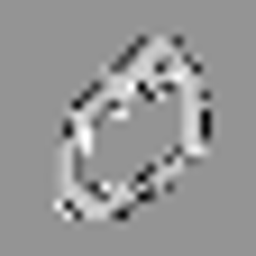

In [60]:
example(1)

In [61]:
train_loader.__iter__().__next__()[1]


tensor([9, 2, 4, 9, 0, 8, 1, 2, 4, 1, 3, 5, 6, 6, 4, 8, 0, 1, 5, 7, 6, 6, 8, 7,
        6, 7, 2, 4, 8, 8, 2, 2, 0, 3, 0, 1, 0, 9, 7, 1, 7, 4, 1, 3, 0, 2, 1, 8,
        7, 3, 3, 3, 1, 0, 9, 7, 7, 8, 6, 8, 7, 2, 3, 6])

In [62]:
train_loader.__iter__().__next__()[0].shape


torch.Size([64, 1, 28, 28])

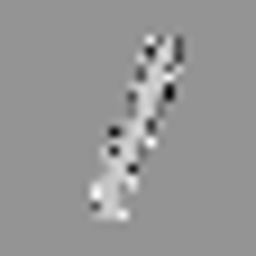

In [63]:
toPIL(train_loader.__iter__().__next__()[0][0]).resize((256,256))

Let's write a simple helper module.

In [64]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        batch_size = x.shape[0]
        return x.view(batch_size, -1)


In [65]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

Why do we need `Flatten` module?

---



Setup an optimizer:


In [66]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Choose a loss function:

In [67]:
loss_function = loss.CrossEntropyLoss()


And start training:

In [68]:
def train(model, train_loader, optimizer, loss_function, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [69]:
def test(model, test_loader, loss_function):
    
    incorrect_pred_idx=[]
    incorrect_pred = []

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for i, [data, target] in enumerate(test_loader):
            output = model(data)
            test_loss += loss_function(output, target).sum().item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
            # Store wrongly predicted images
            wrong_idx = (pred != target.view_as(pred)).nonzero()[:, 0]
            if wrong_idx.nelement() != 0:
                wrong_pred = pred[wrong_idx]
                incorrect_pred_idx.append(wrong_idx)
                incorrect_pred.append(wrong_pred)
                
    test_loss /= len(test_loader.dataset)
    

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return incorrect_pred_idx, incorrect_pred

In [70]:
#  for epoch in range(1, 20):
#         train(model, train_loader, optimizer, loss_function, epoch)
#         test(model, test_loader, loss_function)

# Assignment

## Due to 8AM, 25.05.2021

## 1. MNIST playground [10]

**Important!** This task is not too hard, but it is pretty time-consuming. Total computation time is about 4 hours.

##### 1. Find out how many epochs are needed for our network to stop improving on test dataset (let's stop on 5 epochs without accuracy improvement on the test set). How long does it take? [1]

It takes about 30 seconds, or 5 epochs, before the accuracy stops improving significantly

In [71]:
def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

In [72]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [73]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    incorrect_pred_idx, incorrect_pred = test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327771
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.304363
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.278540
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.186084
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.225507

Test set: Average loss: 0.0024, Accuracy: 9538/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.047927
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.105109
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.102747
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.122402
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.177707

Test set: Average loss: 0.0017, Accuracy: 9653/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.061931
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.057408
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.044469
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.018160
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.045129

Test set: Average loss: 0.0016, Accuracy: 9677/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.016354
Train Epoch: 4 [12800/60000 (21%)]	Lo

##### 2. Find some problematic examples and show them with `example()` function we defined in class.[1]

In [74]:
incorrect_pred

[tensor([[9],
         [8]]),
 tensor([[9]]),
 tensor([[2],
         [8],
         [9]]),
 tensor([[7],
         [9]]),
 tensor([[3],
         [5],
         [3],
         [3],
         [2]]),
 tensor([[8]]),
 tensor([[5]]),
 tensor([[6],
         [5]]),
 tensor([[3]]),
 tensor([[3]]),
 tensor([[3]]),
 tensor([[6]]),
 tensor([[8]]),
 tensor([[8],
         [7],
         [7],
         [1]]),
 tensor([[6]]),
 tensor([[3],
         [4],
         [4]]),
 tensor([[3],
         [2]]),
 tensor([[8],
         [8]]),
 tensor([[4],
         [0],
         [8]]),
 tensor([[3],
         [0]]),
 tensor([[9]]),
 tensor([[6],
         [3],
         [8]]),
 tensor([[3],
         [4],
         [9]]),
 tensor([[7]]),
 tensor([[7]]),
 tensor([[4],
         [4],
         [5]]),
 tensor([[7]]),
 tensor([[3],
         [7]]),
 tensor([[2],
         [7]]),
 tensor([[5]]),
 tensor([[3],
         [6]]),
 tensor([[3]]),
 tensor([[4]]),
 tensor([[8],
         [3],
         [6],
         [6]]),
 tensor([[2]]),
 tenso

In [75]:
def example_train(i):
    print(train_dataset[i][1])
    return toPIL(train_dataset[i][0]).resize((256, 256))

In [76]:
def example_test(i):
    print(test_dataset[i][1])
    test_dataset[i][1].label
    return toPIL(test_dataset[i][0]).resize((256, 256)), labelx

In [77]:
incorrect_pred_idx[:10]

[tensor([10, 24]),
 tensor([36]),
 tensor([ 4, 18, 32]),
 tensor([36, 50]),
 tensor([14, 30, 33, 44, 46]),
 tensor([51]),
 tensor([48]),
 tensor([27, 56]),
 tensor([23]),
 tensor([53])]

In [78]:
incorrect_pred_idx[0]

tensor([10, 24])

can scroll through incorrect examples by chaning the wrong_idx var,        and running this cell and the next one
2


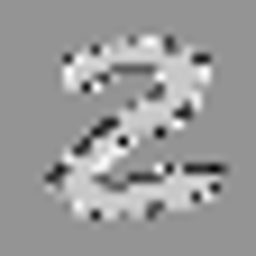

In [79]:
print('can scroll through incorrect examples by chaning the wrong_idx var, \
       and running this cell and the next one')

wrong_idx = 30

sample_number = incorrect_pred_idx[wrong_idx].numpy()[0]
example_train(sample_number)

In [80]:
print('Incorrect sample number: ', sample_number)
print('The predicted class for this number was:')

incorrect_pred[sample_number].numpy()[0]

Incorrect sample number:  25
The predicted class for this number was:


array([4])

##### 3. Draw a confusion matrix for your model on test dataset. It is a 10x10 matrix, and in the cell `(i,j)` there is a number of digits `i` classified as digit `j`.[1]

In [81]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [82]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10000)
    train_preds = get_all_preds(model, prediction_loader)

In [83]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [84]:
train_preds.argmax(dim=1)

tensor([5, 0, 4,  ..., 5, 6, 8])

In [85]:
stacked = torch.stack(
    (
        train_dataset.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)

stacked.shape
torch.Size([60000, 2])

stacked

tensor([[5, 5],
        [0, 0],
        [4, 4],
        ...,
        [5, 5],
        [6, 6],
        [8, 8]])

In [86]:
stacked[0].tolist()

[5, 5]

In [87]:
cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [88]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

In [89]:
cmt

tensor([[5907,    1,    0,    2,    2,    0,    4,    0,    4,    3],
        [   0, 6693,    8,    9,    5,    1,    1,   13,    4,    8],
        [   3,    2, 5934,    4,    4,    0,    0,    5,    5,    1],
        [   0,    0,   10, 6100,    1,    4,    0,    2,   10,    4],
        [   2,    2,    3,    0, 5771,    0,    5,    2,    3,   54],
        [   0,    0,    1,   24,    2, 5369,    9,    0,    8,    8],
        [   9,    1,    2,    0,    6,    4, 5886,    0,   10,    0],
        [   1,    6,    7,    5,    7,    0,    0, 6225,    1,   13],
        [   3,    7,    2,   12,    0,    3,    1,    2, 5820,    1],
        [   4,    1,    0,    5,   13,    1,    0,    8,    5, 5912]])

In [90]:
cm = confusion_matrix(train_dataset.targets, train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5907,    1,    0,    2,    2,    0,    4,    0,    4,    3],
       [   0, 6693,    8,    9,    5,    1,    1,   13,    4,    8],
       [   3,    2, 5934,    4,    4,    0,    0,    5,    5,    1],
       [   0,    0,   10, 6100,    1,    4,    0,    2,   10,    4],
       [   2,    2,    3,    0, 5771,    0,    5,    2,    3,   54],
       [   0,    0,    1,   24,    2, 5369,    9,    0,    8,    8],
       [   9,    1,    2,    0,    6,    4, 5886,    0,   10,    0],
       [   1,    6,    7,    5,    7,    0,    0, 6225,    1,   13],
       [   3,    7,    2,   12,    0,    3,    1,    2, 5820,    1],
       [   4,    1,    0,    5,   13,    1,    0,    8,    5, 5912]])

In [91]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show
    

In [92]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, train_dataset.classes)

Confusion matrix, without normalization
[[5907    1    0    2    2    0    4    0    4    3]
 [   0 6693    8    9    5    1    1   13    4    8]
 [   3    2 5934    4    4    0    0    5    5    1]
 [   0    0   10 6100    1    4    0    2   10    4]
 [   2    2    3    0 5771    0    5    2    3   54]
 [   0    0    1   24    2 5369    9    0    8    8]
 [   9    1    2    0    6    4 5886    0   10    0]
 [   1    6    7    5    7    0    0 6225    1   13]
 [   3    7    2   12    0    3    1    2 5820    1]
 [   4    1    0    5   13    1    0    8    5 5912]]


##### 4. By default weight of linear layer is initialized with `kaiming_uniform` function and bias is unitialized with `uniform` function (see reset parameters method of Linear class https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py). Initialize all weights as `uniform(-0.1,0.1)` and test. How does this modification affect training process? Is it faster/slower? Is the end result better/worse? Same question form `uniform(-1, 1)`. Same question for `constant(0)` initialization. Don't forget to recreate optimizer for your new model (otherwise you'll optimize parameters of the old model using values from the new one, which does not work).[1]

In [93]:
initialize_weight = 0.1

class ChildLinear(nn.Linear):
    def reset_parameters(self) -> None:
        stdv = initialize_weight
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

In [94]:
model = nn.Sequential(Flatten(), 
                      ChildLinear(784, 512), 
                      nn.Tanh(),
                      ChildLinear(512, 64), 
                      nn.Tanh(),
                      ChildLinear(64, 10))

In [95]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): ChildLinear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): ChildLinear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): ChildLinear(in_features=64, out_features=10, bias=True)
)

In [96]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    incorrect_pred_idx, incorrect_pred = pred_list = test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.343165
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.343582
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.144371
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.166742
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.310330

Test set: Average loss: 0.0025, Accuracy: 9526/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.081811
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.155884
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.134297
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.081770
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.037153

Test set: Average loss: 0.0017, Accuracy: 9681/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.105415
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.078418
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.086743
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.046567
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.025844

Test set: Average loss: 0.0015, Accuracy: 9683/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.055795
Train Epoch: 4 [12800/60000 (21%)]	Lo

"initialize_weight = 0.1"

##### How does this affect the training process?

- training deep models is a sufficiently difficult task that most algorithms are strongly affected by the choice of initialization. The initial point can determine whether the algorithm converges at all, with some initial points being so unstable that the algorithm encounters numerical difficulties and fails altogether.

##### Is it faster slower?

- The time it takes for 4 epochs is 2 seconds less, maybe it is closer to the best weights this particular initialization.

##### Is the result better or worse?

The result is almost equal

In [97]:
initialize_weight = 1

class ChildLinear(nn.Linear):
    def reset_parameters(self) -> None:
        stdv = initialize_weight
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

In [98]:
model = nn.Sequential(Flatten(), 
                      ChildLinear(784, 512), 
                      nn.Tanh(),
                      ChildLinear(512, 64), 
                      nn.Tanh(),
                      ChildLinear(64, 10))

In [99]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): ChildLinear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): ChildLinear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): ChildLinear(in_features=64, out_features=10, bias=True)
)

In [100]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 6.795565
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.103507
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.556525
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.720253
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.566370

Test set: Average loss: 0.0087, Accuracy: 8295/10000 (83%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.479869
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.205330
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.472322
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.487053
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.513957

Test set: Average loss: 0.0069, Accuracy: 8653/10000 (87%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.234398
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.389848
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.270156
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.507949
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.457986

Test set: Average loss: 0.0063, Accuracy: 8776/10000 (88%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.200086
Train Epoch: 4 [12800/60000 (21%)]	Lo

"initialize_weight = 1"

##### How does this affect the training process?

- This modification ruins the convergence of the training process as the accuracy stays around 89%, so we lost about 9%

##### Is it faster slower?

- The time it takes is also longer, probably because the initial weights are far from the ideal values it takes longer to converge

##### Is the result better or worse?

As the accuracy does not converge beyond 89% in 4 epochs, so the result is a lot worse

In [101]:
initialize_weight = 0

class ChildLinear(nn.Linear):
    def reset_parameters(self) -> None:
        stdv = initialize_weight
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

In [102]:
model = nn.Sequential(Flatten(), 
                      ChildLinear(784, 512), 
                      nn.Tanh(),
                      ChildLinear(512, 64), 
                      nn.Tanh(),
                      ChildLinear(64, 10))

In [103]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): ChildLinear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): ChildLinear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): ChildLinear(in_features=64, out_features=10, bias=True)
)

In [104]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302583
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.292323
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.305702
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.311464
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.305421

Test set: Average loss: 0.0361, Accuracy: 1135/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.297701
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.307256
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.295778
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.306251
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.295137

Test set: Average loss: 0.0361, Accuracy: 1135/10000 (11%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.315510
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.320227
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.304078
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.308393
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.302799

Test set: Average loss: 0.0361, Accuracy: 1135/10000 (11%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.308627
Train Epoch: 4 [12800/60000 (21%)]	Lo

"initialize_weight = 0"

##### How does this affect the training process?

- This modification ruins the convergence of the training process as the accuracy stays around 11%
- This could be cause if the initial weights are zero, then the network can barely detect those neurons.

##### Is it faster slower?

- The time it takes for 4 epochs is equal to the previous case

##### Is the result better or worse?

As the accuracy does not converge beyond 11% the result is a lot worse

##### 5. Try replacing `Tanh` activation by `Sigmoid` test, how does this modification affect training process? These and further questions assumes that you are changing the initial model (i.e. all modification from previous step are undone). [1]

In [105]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Sigmoid(),
                      nn.Linear(512, 64), 
                      nn.Sigmoid(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [106]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=512, out_features=64, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [107]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.367258
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.719022
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.825644
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.531809
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.379528

Test set: Average loss: 0.0066, Accuracy: 8811/10000 (88%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.404370
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.359103
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.283456
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.337693
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.229880

Test set: Average loss: 0.0048, Accuracy: 9117/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.174228
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.321189
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.215667
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.338313
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.160220

Test set: Average loss: 0.0041, Accuracy: 9238/10000 (92%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.121837
Train Epoch: 4 [12800/60000 (21%)]	Lo

"Sigmoid"

##### How does this affect the training process?

- The sigmoid function appears in the output layer of the deep learning models and is used for predicting probability-based outputs.
- Some of the major drawbacks of the sigmoid function include gradient saturation, slow convergence, sharp damp gradients during backpropagation from within deeper hidden layers to the input layers, and non-zero centered output that causes the gradient updates to propagate in varying directions.

##### Is it faster slower?

- The time is 2 seconds faster than our base model

##### Is the result better or worse?

As the accuracy does not converge beyond 94%, compared to 98% the result is a lot worse

##### 6. Try changing output dimension of the first linear layer  (and input of the second) to `256`, to `1024`. How does this modification affect training process? How does the number of model parameters changes? [1]

In [108]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 256), 
                      nn.Tanh(),
                      nn.Linear(256, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [109]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Tanh()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): Tanh()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [110]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304728
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.379752
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.371282
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.185952
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.244285

Test set: Average loss: 0.0032, Accuracy: 9382/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.225197
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.118574
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.115873
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.042513
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.097945

Test set: Average loss: 0.0017, Accuracy: 9654/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.054184
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.075638
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.071556
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.071817
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.045486

Test set: Average loss: 0.0017, Accuracy: 9679/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.106961
Train Epoch: 4 [12800/60000 (21%)]	Lo

"First linear layer output 256"

##### How does this affect the training process?

- There are some empirically-derived rules-of-thumb, of these, the most commonly relied on is 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'
- Therefore a choice of 256 is a fine choice as it is between the size of the input layer and the output layer

##### Is it faster slower?

- Equal for reasons stated above

##### Is the result better or worse?

- Equal for reasons stated above

In [111]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 1024), 
                      nn.Tanh(),
                      nn.Linear(1024, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [112]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=1024, bias=True)
  (2): Tanh()
  (3): Linear(in_features=1024, out_features=64, bias=True)
  (4): Tanh()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [113]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302829
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.305933
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.375704
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.121127
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.136274

Test set: Average loss: 0.0029, Accuracy: 9454/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.313441
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.189958
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.172870
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.141929
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.123993

Test set: Average loss: 0.0019, Accuracy: 9636/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.041029
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.046995
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.080758
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.108342
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.091366

Test set: Average loss: 0.0015, Accuracy: 9707/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.022703
Train Epoch: 4 [12800/60000 (21%)]	Lo

"First linear layer output 1024"

##### How does this affect the training process?

- A layer in between the input and output layer larger or lower than in the size of the input or output layer is bad practice and should be avoided.
- This can reduce the model complexity when optimizing the neural network, as all the information will have to pass these layers were it will diverge (or converge over a few neurons).

##### Is it faster slower?

- The time it takes for 4 epochs is longer than the benchmark base model

##### Is the result better or worse?

As the accuracy does not converge beyond 97% the result is a bit worse, which makes sense because 1024 is not that much bigger than 784

##### 7. Our model has 2 hidden layers of sizes `512` and `64`. Let's use 3 hidden layers of sizes `512`, `256` and `64`.  How does this modification affect training process? How does the number of model parameters changes? Same question for 3 layers of sizes `512`, `5` and `64`(don't forget to add activation function between linear layers). [1]

In [114]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 32),
                      nn.Tanh(),
                      nn.Linear(32, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [115]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): Linear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): Tanh()
  (7): Linear(in_features=32, out_features=10, bias=True)
)

In [116]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315372
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.372823
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.379658
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.429258
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.147671

Test set: Average loss: 0.0031, Accuracy: 9432/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.158432
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.301684
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.131890
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.051637
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.234587

Test set: Average loss: 0.0018, Accuracy: 9666/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.126603
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.131010
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.123313
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.150254
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.068375

Test set: Average loss: 0.0015, Accuracy: 9692/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.027396
Train Epoch: 4 [12800/60000 (21%)]	Lo

"Add  3 hidden layers of sizes `512`, `256` and `64`. "

##### How does this affect the training process?

- This modification is fine according to the rules of thumb

##### Is it faster slower?

- Equal

##### Is the result better or worse?

- Equal

In [117]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 5), 
                      nn.Tanh(),
                      nn.Linear(5, 64),
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [118]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): Linear(in_features=512, out_features=5, bias=True)
  (4): Tanh()
  (5): Linear(in_features=5, out_features=64, bias=True)
  (6): Tanh()
  (7): Linear(in_features=64, out_features=10, bias=True)
)

In [119]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.322958
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.560374
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.405566
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.542819
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.131538

Test set: Average loss: 0.0047, Accuracy: 9138/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.397148
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.270165
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.175335
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.151393
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.165130

Test set: Average loss: 0.0032, Accuracy: 9464/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.159452
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.283069
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.060759
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.224519
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.198942

Test set: Average loss: 0.0026, Accuracy: 9573/10000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.118145
Train Epoch: 4 [12800/60000 (21%)]	Lo

"Add  3 hidden layers of sizes `512`, `5` and `64`. "

##### How does this affect the training process?

- This modification ruins the model a bit because here is a layer in between with only 5 neurons

##### Is it faster slower?

- The time it takes is equal

##### Is the result better or worse?

- The accuracy is about equal

##### 8. Try adding dropout after first/second layer. How does this modification affect training process? [1]

In [120]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Dropout(0.5),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [121]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=512, out_features=64, bias=True)
  (5): Tanh()
  (6): Linear(in_features=64, out_features=10, bias=True)
)

In [122]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.292633
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.303937
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.444373
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.342879
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.266177

Test set: Average loss: 0.0032, Accuracy: 9400/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.335613
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.160549
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.207899
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.169904
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.111756

Test set: Average loss: 0.0022, Accuracy: 9590/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.146918
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.120969
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.142002
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.157770
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.207270

Test set: Average loss: 0.0018, Accuracy: 9643/10000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.175825
Train Epoch: 4 [12800/60000 (21%)]	Lo

"Add  dropout "

##### How does this affect the training process?

- During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

##### Is it faster slower?

- The time it takes for 4 epochs is 0.5 seconds lower than benchmark

##### Is the result better or worse?

- The result should be a littlebit better, but is equal

##### 9. Try disabling shuffle in the train dataloader (leave it unchanged in the test dataloader, otherwise testing will not be fair). How does this modification affect training process? Do not forget to reset training weights of the model. [1]

In [123]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False)

In [124]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [125]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): Linear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [126]:
%%time
for epoch in range(1, 5):
    train(model, train_loader, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309062
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.247206
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.217764
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.179675
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.211449

Test set: Average loss: 0.0029, Accuracy: 9432/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.111791
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.096746
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.107957
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.090714
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.137758

Test set: Average loss: 0.0019, Accuracy: 9636/10000 (96%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.054833
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.069503
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.057007
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.058898
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.103682

Test set: Average loss: 0.0014, Accuracy: 9705/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.035297
Train Epoch: 4 [12800/60000 (21%)]	Lo

"Stop the train dataset loader from shuffling MNIST data. "

##### How does this affect the training process?

- According to the web the MNIST dataset is shuffled, so not shuffling it has no effect 

##### Is it faster slower?

- The time it takes for 4 epochs is equal to the previous case

##### Is the result better or worse?

- Equal

##### 10. Try training, using half of the training dataset. 30%. 10%. How does this affect training process? Do not forget to reset training weights of the model. [1] 

In [127]:
from torch.utils.data import RandomSampler, DataLoader, Subset

In [128]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [129]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([64, 1, 28, 28])

#### So one train data batch is a  tensor of shape: torch.Size([64,1, 28, 28]). This means we have 1000 examples of 28x28 pixels in grayscale (i.e. no rgb channels, hence the one). We can plot some of them using matplotlib.

In [130]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

In [131]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): Linear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [132]:
train_ds = train_dataset
num_train_samples = 30000
sample_ds = Subset(train_dataset, np.arange(num_train_samples))
sample_sampler = RandomSampler(sample_ds)
sample_dl = DataLoader(sample_ds, sampler=sample_sampler, batch_size=64)

In [133]:
%%time
for epoch in range(1, 5):
    train(model, sample_dl, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/30000 (0%)]	Loss: 2.265165
Train Epoch: 1 [12800/30000 (43%)]	Loss: 0.310917
Train Epoch: 1 [25600/30000 (85%)]	Loss: 0.201090

Test set: Average loss: 0.0039, Accuracy: 9289/10000 (93%)

Train Epoch: 2 [0/30000 (0%)]	Loss: 0.227417
Train Epoch: 2 [12800/30000 (43%)]	Loss: 0.157015
Train Epoch: 2 [25600/30000 (85%)]	Loss: 0.300440

Test set: Average loss: 0.0027, Accuracy: 9486/10000 (95%)

Train Epoch: 3 [0/30000 (0%)]	Loss: 0.068329
Train Epoch: 3 [12800/30000 (43%)]	Loss: 0.131746
Train Epoch: 3 [25600/30000 (85%)]	Loss: 0.166613

Test set: Average loss: 0.0021, Accuracy: 9607/10000 (96%)

Train Epoch: 4 [0/30000 (0%)]	Loss: 0.121136
Train Epoch: 4 [12800/30000 (43%)]	Loss: 0.112726
Train Epoch: 4 [25600/30000 (85%)]	Loss: 0.099924

Test set: Average loss: 0.0018, Accuracy: 9648/10000 (96%)

CPU times: user 2min 9s, sys: 464 ms, total: 2min 10s
Wall time: 16.4 s


"Use only 50% of the training dataset."

##### How does this affect the training process?

- This modification caps the accuracy on the test dataset

##### Is it faster slower?

- Using half of the dataset is 2x as fast ofcourse

##### Is the result better or worse?

As the accuracy is not so much worse, and the speed is much faster. More epochs result into the same convergence, therefore so far it does not deliver any problems. EQUAL

In [134]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): Linear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [135]:
train_ds = train_dataset
num_train_samples = 20000
sample_ds = Subset(train_dataset, np.arange(num_train_samples))
sample_sampler = RandomSampler(sample_ds)
sample_dl = DataLoader(sample_ds, sampler=sample_sampler, batch_size=64)

In [136]:
%%time
for epoch in range(1, 7):
    train(model, sample_dl, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/20000 (0%)]	Loss: 2.292285
Train Epoch: 1 [12800/20000 (64%)]	Loss: 0.246990

Test set: Average loss: 0.0043, Accuracy: 9219/10000 (92%)

Train Epoch: 2 [0/20000 (0%)]	Loss: 0.466618
Train Epoch: 2 [12800/20000 (64%)]	Loss: 0.350250

Test set: Average loss: 0.0035, Accuracy: 9343/10000 (93%)

Train Epoch: 3 [0/20000 (0%)]	Loss: 0.209156
Train Epoch: 3 [12800/20000 (64%)]	Loss: 0.110871

Test set: Average loss: 0.0030, Accuracy: 9429/10000 (94%)

Train Epoch: 4 [0/20000 (0%)]	Loss: 0.120007
Train Epoch: 4 [12800/20000 (64%)]	Loss: 0.197351

Test set: Average loss: 0.0026, Accuracy: 9490/10000 (95%)

Train Epoch: 5 [0/20000 (0%)]	Loss: 0.167858
Train Epoch: 5 [12800/20000 (64%)]	Loss: 0.072866

Test set: Average loss: 0.0021, Accuracy: 9607/10000 (96%)

Train Epoch: 6 [0/20000 (0%)]	Loss: 0.078825
Train Epoch: 6 [12800/20000 (64%)]	Loss: 0.059799

Test set: Average loss: 0.0020, Accuracy: 9616/10000 (96%)

CPU times: user 2min 25s, sys: 272 ms, total: 2min 25s
Wall time

"Use only 30% of the training dataset."

##### How does this affect the training process?

- It is obvious that the accuracy is less than the previous accuracy

##### Is it faster slower?

- The speed up is linear

##### Is the result better or worse?

The result is worse in the same amount of epochs, this time when I linearly increase the epochs corresponding to the dataset size, the accuracy is 4% less. Therefore this result is worse.

In [137]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Tanh()
  (3): Linear(in_features=512, out_features=64, bias=True)
  (4): Tanh()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [138]:
train_ds = train_dataset
num_train_samples = 6000
sample_ds = Subset(train_dataset, np.arange(num_train_samples))
sample_sampler = RandomSampler(sample_ds)
sample_dl = DataLoader(sample_ds, sampler=sample_sampler, batch_size=64)

In [ ]:
%%time
for epoch in range(1, 5):
    train(model, sample_dl, optimizer, loss_function, epoch)
    test(model, test_loader, loss_function)

Train Epoch: 1 [0/6000 (0%)]	Loss: 2.325476


"Use only 10% of the training dataset."

##### How does this affect the training process?

- Now the dataset is too small to be competing with the trained nets above. It becomes clear a larger dataset is preferable.

##### Is it faster slower?

- Way faster

##### Is the result better or worse?

As the accuracy does not converge beyond 92%, the result is a lot worse.